<a href="https://colab.research.google.com/github/arnab-mkj/Time_Series/blob/main/Madrid_weather_simple_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import random


In [ ]:
seed = 52
tf.random.set_seed(seed)
random.seed(seed)

window_size = 2*365+1
batch_size = 32

In [ ]:
df = pd.read_csv('/content/sample_data/weather_madrid_LEMD_1997_2015.csv', parse_dates={'Date':[0]})
df.shape

<ipython-input-6-4b696a963598>:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/sample_data/weather_madrid_LEMD_1997_2015.csv', parse_dates={'Date':[0]})


(6812, 23)

In [ ]:
df.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [ ]:
start_date = df.head(1)['Date'][0]
end_date = df.tail(1)['Date'][len(df)-1]

In [ ]:
missing_dates = pd.date_range(start=start_date, end=end_date).difference(df['Date'])
len(missing_dates)

127

In [ ]:
# Process Dates
#cover string to datettime
if not pd.api.types.is_datetime64_any_dtype(df.Date):
    df.date = pd.to_datetime(df.Date, format='%Y-%m-%d')

existing_dates = list(df.Date)
for i in range(6939):
  d = df.Date.iloc[0] + np.timedelta64(i, 'D')
  if not d in existing_dates:
    print(d)

2000-02-23 00:00:00
2000-02-24 00:00:00
2000-02-25 00:00:00
2000-02-26 00:00:00
2000-02-27 00:00:00
2000-02-28 00:00:00
2000-02-29 00:00:00
2000-03-01 00:00:00
2000-03-02 00:00:00
2000-03-03 00:00:00
2000-03-04 00:00:00
2000-03-05 00:00:00
2000-03-06 00:00:00
2000-03-07 00:00:00
2000-03-08 00:00:00
2000-03-09 00:00:00
2000-03-10 00:00:00
2000-03-11 00:00:00
2000-03-12 00:00:00
2000-03-13 00:00:00
2000-03-14 00:00:00
2000-03-15 00:00:00
2000-03-16 00:00:00
2000-03-17 00:00:00
2000-03-18 00:00:00
2000-03-19 00:00:00
2000-03-20 00:00:00
2000-03-21 00:00:00
2000-03-22 00:00:00
2000-03-23 00:00:00
2000-03-24 00:00:00
2000-03-25 00:00:00
2000-03-26 00:00:00
2000-03-27 00:00:00
2000-03-28 00:00:00
2000-03-29 00:00:00
2000-03-30 00:00:00
2000-03-31 00:00:00
2000-04-01 00:00:00
2000-04-02 00:00:00
2000-04-03 00:00:00
2000-04-04 00:00:00
2000-04-05 00:00:00
2000-04-06 00:00:00
2000-04-07 00:00:00
2000-04-08 00:00:00
2000-04-09 00:00:00
2000-04-10 00:00:00
2000-04-11 00:00:00
2000-04-12 00:00:00


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,6812,2006-08-07 00:57:55.278919680,1997-01-01 00:00:00,2001-12-05 18:00:00,2006-09-03 12:00:00,2011-05-03 06:00:00,2015-12-31 00:00:00,NaN
Max TemperatureC,6810.0,21.039648,0.0,13.0,20.0,29.0,41.0,8.867187
Mean TemperatureC,6809.0,14.658687,-3.0,8.0,14.0,21.0,32.0,7.580461
Min TemperatureC,6810.0,8.640529,-10.0,3.0,9.0,14.0,28.0,6.837626
Dew PointC,6810.0,8.120705,-12.0,5.0,8.0,12.0,20.0,4.741067
MeanDew PointC,6810.0,4.976211,-15.0,2.0,6.0,8.0,16.0,4.65427
Min DewpointC,6810.0,1.451248,-22.0,-2.0,2.0,5.0,14.0,4.909705
Max Humidity,6810.0,81.139354,16.0,68.0,87.0,94.0,100.0,17.531839
Mean Humidity,6810.0,57.971366,15.0,41.0,59.0,74.0,100.0,19.675744
Min Humidity,6810.0,34.729369,4.0,19.0,32.0,47.75,100.0,19.320359


In [ ]:
missing_MeanTemp = df.loc[df['Mean TemperatureC'].isna()]
missing_MeanTemp

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
1240,2000-08-22,27.0,NaN,27.0,-1.0,-1.0,-1.0,16.0,16.0,16.0,...,NaN,NaN,NaN,19,19,NaN,0.0,NaN,NaN,260
1539,2001-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26,14,NaN,0.0,NaN,NaN,231
1540,2001-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26,11,NaN,0.0,NaN,NaN,248


# DATA cleaning

In [ ]:
last_missing_datetime = missing_dates[-1:].values[0]
last_missing_datetime

numpy.datetime64('2004-01-31T00:00:00.000000000')

In [ ]:
original_df = df.copy(deep=True)

In [ ]:
df = df[df['Date'] > '2004-01-31'].reset_index(drop=True)

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Max TemperatureC,4352.0,21.250689,8.982573,0.0,14.00,21.0,29.0,41.0
Mean TemperatureC,4352.0,14.790441,7.707400,-3.0,8.00,14.0,22.0,31.0
Min TemperatureC,4352.0,8.641544,6.960585,-10.0,3.00,9.0,14.0,26.0
Dew PointC,4352.0,7.861903,4.824524,-12.0,5.00,8.0,11.0,20.0
MeanDew PointC,4352.0,4.671415,4.730477,-15.0,2.00,5.0,8.0,16.0
Min DewpointC,4352.0,1.053079,4.964288,-22.0,-2.00,1.0,4.0,14.0
Max Humidity,4352.0,80.089844,17.970109,26.0,66.00,86.0,94.0,100.0
Mean Humidity,4352.0,56.518382,19.915857,15.0,39.00,57.0,73.0,99.0
Min Humidity,4352.0,32.469899,19.211592,4.0,16.00,29.0,45.0,93.0
Max Sea Level PressurehPa,4352.0,1020.367417,6.364322,994.0,1017.00,1020.0,1024.0,1047.0


#Preprocessing the data

In [ ]:
split_index = df[df['Date'] == '2013-01-01'].index[0] # using the last 3 years as test data

In [ ]:
# drop features we are not considering
df.drop(['Date', 'Max TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'], axis='columns', inplace=True)


In [ ]:
df

,Mean TemperatureC
0,9.0
1,11.0
2,10.0
3,11.0
4,11.0
...,...
4347,7.0
4348,8.0
4349,8.0
4350,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mean TemperatureC  4352 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [ ]:
from sklearn.model_selection import train_test_split

train_df = df[:split_index]
train_df, val_df = train_test_split(train_df, test_size=0.225, shuffle=False)
test_df = df[split_index:]
len(val_df)

733

In [ ]:
#Normallize

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

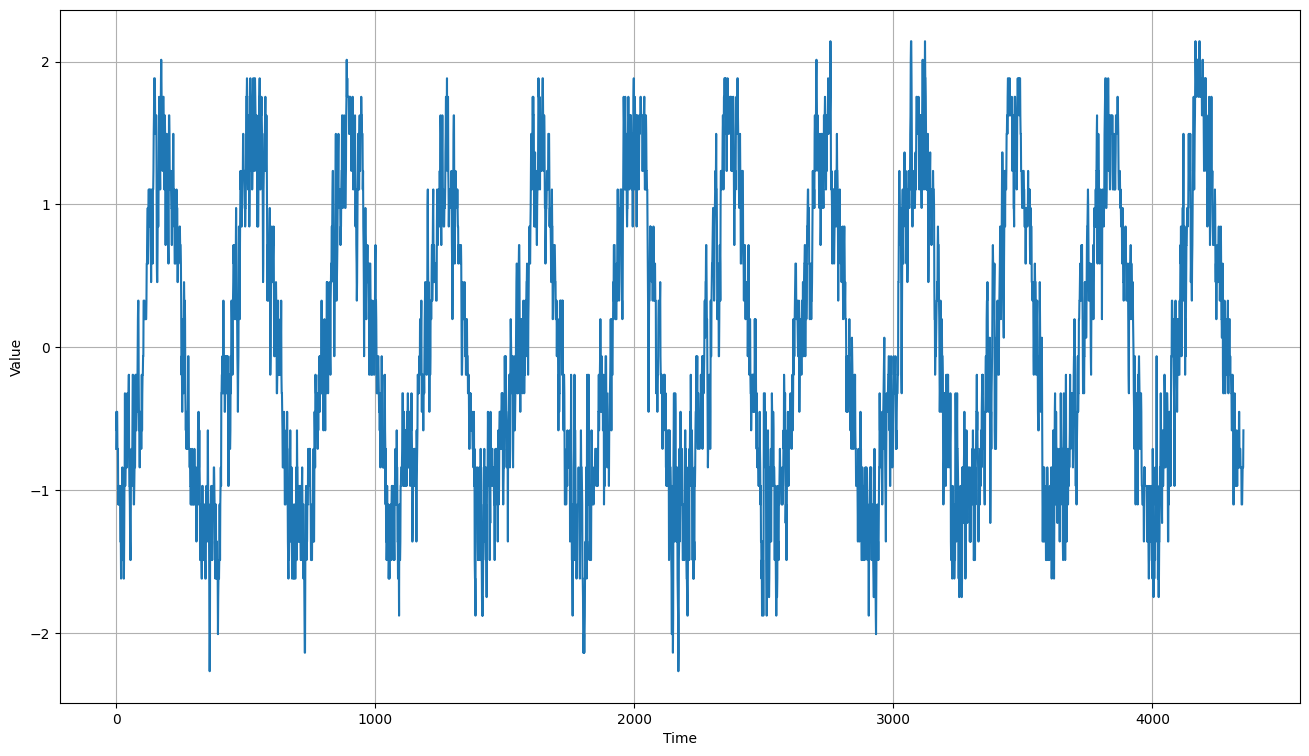

In [ ]:
series_df = df
series_df = (series_df - train_mean) / train_std
series = np.array(series_df['Mean TemperatureC'])
time = np.array(df.index)
plt.figure(figsize=(16,9))
plot_series(time, series)


**ds = ds.map(...):** This part applies a transformation to each element in the ds dataset.
Think of map like this: it takes each item in a collection, does something to it, and puts the modified item into a new collection.

**lambda window: (window[:-1], window[-1]):** This is the core of the transformation. It's a lambda function, which is a compact way to define a function in a single line.

**window:** Represents a single element from the ds dataset, which at this point in the code is a batch of consecutive time series data points (a "window").

**window[:-1]:** This slices the window and selects all elements except the last one. This would represent the input to the forecasting model (the past data).
window[-1]: This selects only the last element of the window. This would represent the target or label for the forecasting model (the value we want to predict).

**(window[:-1], window[-1]):** Combining these two, the lambda function takes a window of data and splits it into two parts: input data and target data.

num_parallel_calls=tf.data.experimental.AUTOTUNE: This argument controls the parallelization of the map operation.
tf.data.experimental.AUTOTUNE: Lets TensorFlow automatically determine the optimal number of parallel processes to use, which can significantly speed up data processing.

In summary, this line of code transforms the dataset from a series of data windows into a dataset of (input, target) pairs, preparing it for use in training a time series forecasting model. It efficiently slices each window of data to create inputs and targets and leverages parallel processing for faster execution.

In [ ]:
def get_dataset(series, window_size, batch_size, shuffle=False, cache=False):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift = 1, drop_remainder=True)
  ds = ds.flat_map(lambda window: window.batch(window_size +1))
  ds = ds.map(lambda window: (window[:-1], window[-1]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
  if shuffle:
    ds = ds.shuffle(1024)
  ds = ds.batch(batch_size)
  if cache:
    ds = ds.cache()
  ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
  return ds



In [ ]:
x_train = np.array(train_df['Mean TemperatureC'])
train_ds = get_dataset(x_train, window_size, batch_size, shuffle=True)
x_val = np.array(val_df['Mean TemperatureC'])
val_ds = get_dataset(x_val, window_size, batch_size, shuffle=False, cache=True)
x_test = np.array(test_df['Mean TemperatureC'])
test_ds = get_dataset(x_test, window_size, batch_size, shuffle=False, cache=True)

y_true = x_test

# Baseline

In [ ]:

# model that just returns the current temperature as the prediciton, prediction "no change"
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras import Model, Input

input1 = Input(shape=(window_size,)) # Keras function that creates an input object, representing the starting point of data flow in your model.
out = Lambda(lambda x: x[:, -1])(input1) #This variable stores the output of the Lambda layer, which is now a tensor containing only the last temperature value of each input window.

model = Model(inputs=[input1], outputs=[out])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 731)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None)                      │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(mse, mae) = model.evaluate(test_ds)
print('mean squared error = ' + str(mse))
print('mean absolute error = ' + str(mae))

      1/Unknown 0s 243ms/step - loss: 0.1373 - mae: 0.2636

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, None))
  warnings.warn(msg)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0915 - mae: 0.2220
mean squared error = 0.07386527955532074
mean absolute error = 0.177371084690094


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [ ]:
def unscale_series(s):
  return(s * train_std[0] + train_mean[0])

In [ ]:
results = model.predict(test_ds)

m = tf.keras.metrics.MeanAbsoluteError()
m.update_state(unscale_series(x_test[window_size:]), unscale_series(results))
mae = m.result().numpy()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 731))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 731))
  warnings.warn(msg)
<ipython-input-29-afd6257400de>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return(s * train_std[0] + train_mean[0])


In [ ]:
m = tf.keras.metrics.MeanSquaredError()
m.update_state(unscale_series(x_test[window_size:]), unscale_series(results))
mse = m.result().numpy()

<ipython-input-29-afd6257400de>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return(s * train_std[0] + train_mean[0])


In [ ]:
report = pd.DataFrame(columns=['Model','MAE','MSE'])
report.loc[len(report)] = ['Baseline', mae, mse]

#Simple RNN Model

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(seed)
random.seed(seed)

from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import Model

In [ ]:
input1 = Input(shape=[window_size,1])
x = SimpleRNN(64)(input1)
x = Dense(64, activation='relu')(x)
out = Dense(1)(x)

model = Model(inputs=[input1], outputs=[out])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 731, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,449 (33.00 KB)

 Trainable params: 8,449 (33.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
filepath='model.weights.h5'

mc = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=0, save_weights_only=True,
                                        monitor='val_loss', mode='auto', save_best_only=True)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

history = model.fit(train_ds, epochs=500, verbose=2, callbacks=[es, mc], validation_data=val_ds)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(None, None))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


57/57 - 8s - 135ms/step - loss: 0.1061 - mae: 0.2552 - val_loss: 0.0023 - val_mae: 0.0386
Epoch 2/500
57/57 - 10s - 179ms/step - loss: 0.0752 - mae: 0.2131 - val_loss: 0.0157 - val_mae: 0.1234
Epoch 3/500
57/57 - 9s - 167ms/step - loss: 0.0682 - mae: 0.2035 - val_loss: 0.0125 - val_mae: 0.1044
Epoch 4/500
57/57 - 9s - 164ms/step - loss: 0.0649 - mae: 0.1988 - val_loss: 0.0603 - val_mae: 0.2422
Epoch 5/500
57/57 - 6s - 101ms/step - loss: 0.0707 - mae: 0.2100 - val_loss: 0.0161 - val_mae: 0.1226
Epoch 6/500
57/57 - 4s - 78ms/step - loss: 0.0659 - mae: 0.1998 - val_loss: 0.0072 - val_mae: 0.0696
Epoch 7/500
57/57 - 6s - 104ms/step - loss: 0.0715 - mae: 0.2081 - val_loss: 0.0082 - val_mae: 0.0905
Epoch 8/500
57/57 - 4s - 79ms/step - loss: 0.0639 - mae: 0.1965 - val_loss: 0.0024 - val_mae: 0.0471
Epoch 9/500
57/57 - 5s - 95ms/step - loss: 0.0638 - mae: 0.1960 - val_loss: 0.0063 - val_mae: 0.0790
Epoch 10/500
57/57 - 4s - 78ms/step - loss: 0.0648 - mae: 0.1981 - val_loss: 0.0168 - val_mae: 0

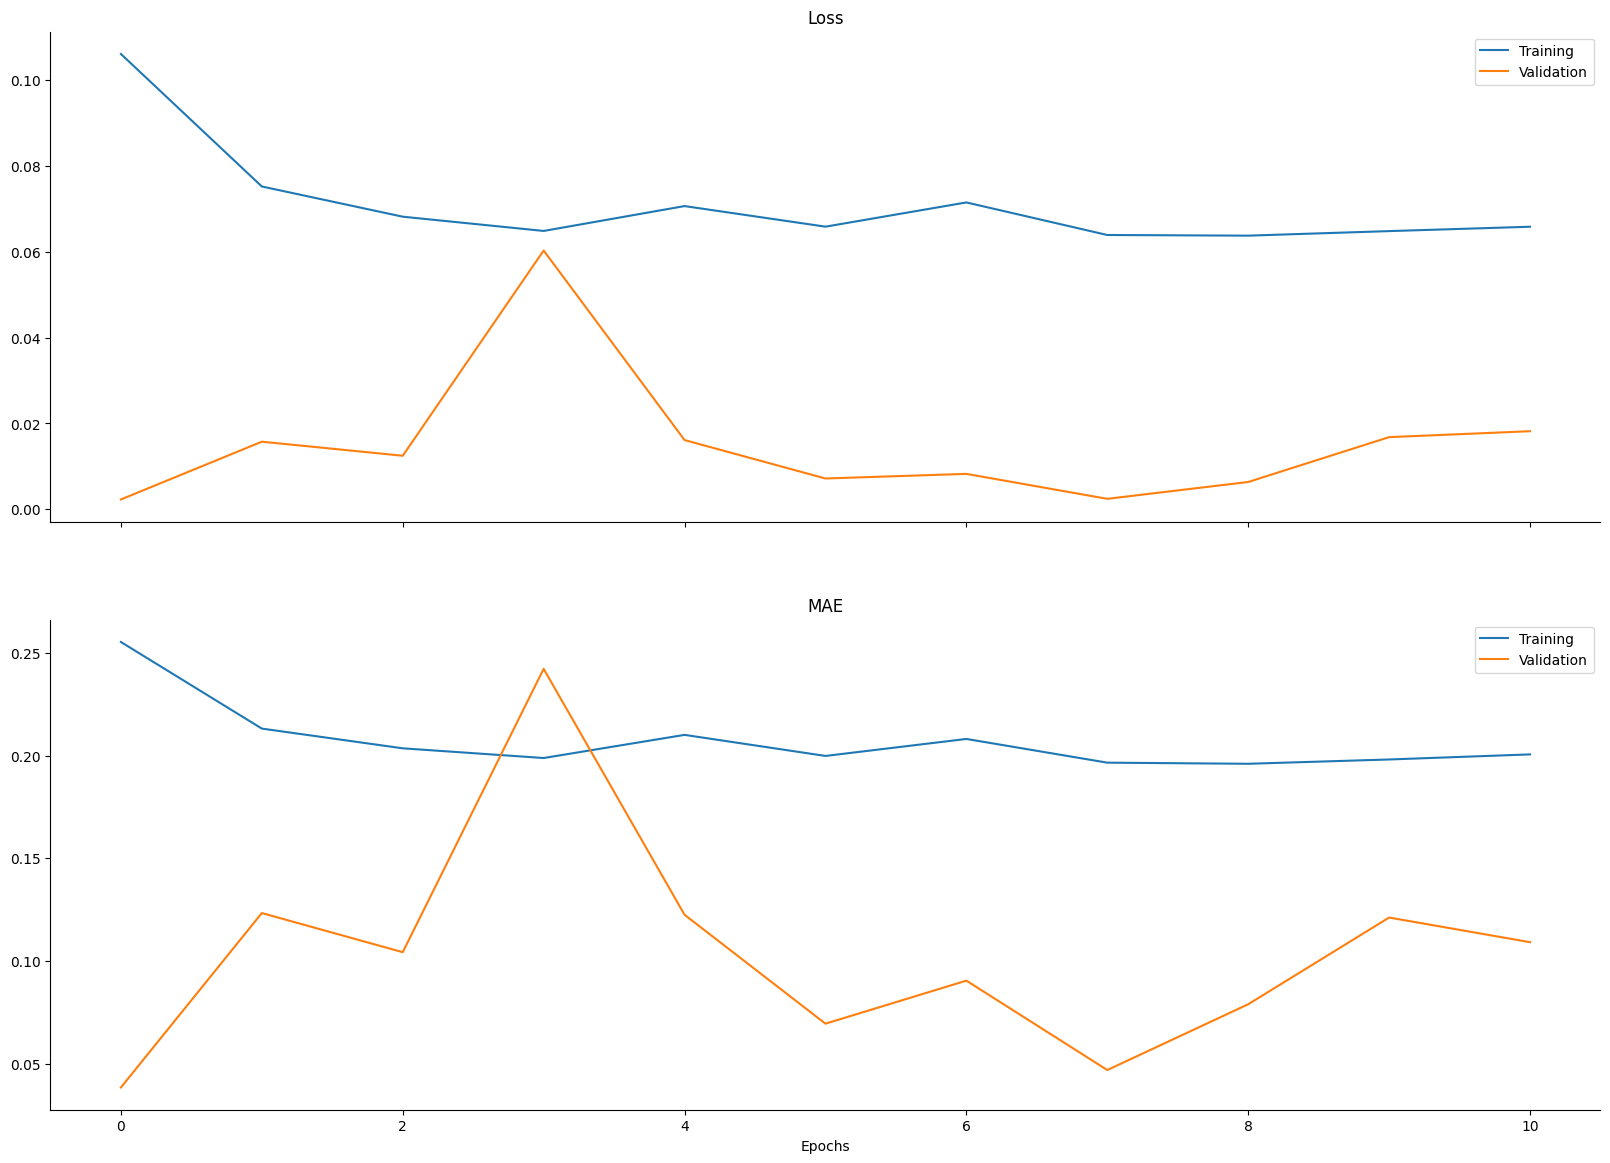

In [ ]:
history = history.history

fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Training')
ax1.plot(history['val_loss'], label='Validation')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['mae'], label='Training')
ax2.plot(history['val_mae'], label='Validation')
ax2.legend(loc='best')
ax2.set_title('MAE')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [ ]:
model.load_weights('model.weights.h5')
(mse, mae) = model.evaluate(test_ds)
print('mean squared error = ' + str(mse))
print('mean absolute error = ' + str(mae))

results = model.predict(test_ds)

m = tf.keras.metrics.MeanAbsoluteError()
m.update_state(unscale_series(x_test[window_size:]), unscale_series(results))
mae = m.result().numpy()

m = tf.keras.metrics.MeanSquaredError()
m.update_state(unscale_series(x_test[window_size:]), unscale_series(results))
mse = m.result().numpy()

report.loc[len(report)] = ['SimpleRNN', mae, mse]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1099 - mae: 0.2549
mean squared error = 0.09049876779317856
mean absolute error = 0.23228037357330322
      4/Unknown 0s 20ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(32, 731))
  warnings.warn(msg)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(None, 731))
  warnings.warn(msg)
<ipython-input-29-afd6257400de>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return(s * train_std[0] + train_mean[0])


#LSTM Model

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(seed)
random.seed(seed)

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Model

input1 = Input(shape=[window_size,1])
x = LSTM(512)(input1)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
out = Dense(1)(x)

model = Model(inputs=[input1], outputs=[out])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse',
              metrics=['mae'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 731, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 512)                 │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,217,025 (4.64 MB)

 Trainable params: 1,217,025 (4.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
filepath = 'model.weights.h5'

mc = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=0, save_weights_only=True,
                                        monitor='val_loss', mode='auto', save_best_only=True)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')

history = model.fit(train_ds, epochs=50, verbose=2, callbacks=[es, mc], validation_data=val_ds)

Epoch 1/50
57/57 - 306s - 5s/step - loss: 0.0682 - mae: 0.2031 - val_loss: 0.0901 - val_mae: 0.2988
Epoch 2/50
57/57 - 318s - 6s/step - loss: 0.0683 - mae: 0.2027 - val_loss: 0.0280 - val_mae: 0.1645
Epoch 3/50
57/57 - 310s - 5s/step - loss: 0.0680 - mae: 0.2025 - val_loss: 0.1043 - val_mae: 0.3217
Epoch 4/50
57/57 - 320s - 6s/step - loss: 0.0706 - mae: 0.2057 - val_loss: 0.0187 - val_mae: 0.1342
Epoch 5/50
57/57 - 323s - 6s/step - loss: 0.0690 - mae: 0.2040 - val_loss: 0.0192 - val_mae: 0.1364
Epoch 6/50
57/57 - 328s - 6s/step - loss: 0.0742 - mae: 0.2127 - val_loss: 0.0079 - val_mae: 0.0836
Epoch 7/50
57/57 - 320s - 6s/step - loss: 0.0667 - mae: 0.2012 - val_loss: 0.0509 - val_mae: 0.2239
Epoch 8/50
57/57 - 321s - 6s/step - loss: 0.0677 - mae: 0.2025 - val_loss: 0.0011 - val_mae: 0.0280
Epoch 9/50
57/57 - 306s - 5s/step - loss: 0.0672 - mae: 0.2007 - val_loss: 0.3091 - val_mae: 0.5547
Epoch 10/50
57/57 - 318s - 6s/step - loss: 0.1306 - mae: 0.2686 - val_loss: 0.0256 - val_mae: 0.1598

In [ ]:
history = history.history

fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Training')
ax1.plot(history['val_loss'], label='Validation')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['mae'], label='Training')
ax2.plot(history['val_mae'], label='Validation')
ax2.legend(loc='best')
ax2.set_title('MAE')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [ ]:
model.load_weights('model.weights.h5')
(mse, mae) = model.evaluate(test_ds)
print('mean squared error = ' + str(mse))
print('mean absolute error = ' + str(mae))

In [ ]:
time_test = np.array(test_df.index)

forecast=[]
times = range(split_index-window_size, len(series)-window_size)
for time in times:
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(16, 9))

plot_series(time_test, x_test)
plot_series(time_test, results)

In [ ]:
plt.figure(figsize=(16, 9))

plot_series(time_test[-90:], x_test[-90:])
plot_series(time_test[-90:], results[-90:])

In [ ]:
results = model.predict(test_ds)

m = tf.keras.metrics.MeanAbsoluteError()
m.update_state(unscale_series(x_test[window_size:]), unscale_series(results))
mae = m.result().numpy()

m = tf.keras.metrics.MeanSquaredError()
m.update_state(unscale_series(x_test[window_size:]), unscale_series(results))
mse = m.result().numpy()

report.loc[len(report)] = ['LSTM', mae, mse]

In [ ]:
print(report)

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})
ax = sns.barplot(report.MAE, report.Model, orient='h', palette=sns.color_palette("muted"))

for i, mae in enumerate(report.MAE):
    ax.text(mae, i+0.2, f'{mae:.3f}', fontsize=13)
plt.title(f'Mean TemperatureC MAE - 3 years')
plt.xlabel('')
plt.ylabel('')
plt.show()